In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import norm



In [14]:
import pandas as pd

file_path = '/content/drive/MyDrive/EDA-LAB/DA-1/CASchools.csv'
data = pd.read_csv(file_path)

data_info = {
    "Head": data.head(),
    "Shape": data.shape,
    "Info": data.info(),
    "Description": data.describe()
}

data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     420 non-null    int64  
 1   district     420 non-null    int64  
 2   school       420 non-null    object 
 3   county       420 non-null    object 
 4   grades       420 non-null    object 
 5   students     420 non-null    int64  
 6   teachers     420 non-null    float64
 7   calworks     420 non-null    float64
 8   lunch        420 non-null    float64
 9   computer     420 non-null    int64  
 10  expenditure  420 non-null    float64
 11  income       420 non-null    float64
 12  english      420 non-null    float64
 13  read         420 non-null    float64
 14  math         420 non-null    float64
dtypes: float64(8), int64(4), object(3)
memory usage: 49.3+ KB


{'Head':    rownames  district                           school   county grades  \
 0         1     75119               Sunol Glen Unified  Alameda  KK-08   
 1         2     61499             Manzanita Elementary    Butte  KK-08   
 2         3     61549      Thermalito Union Elementary    Butte  KK-08   
 3         4     61457  Golden Feather Union Elementary    Butte  KK-08   
 4         5     61523         Palermo Union Elementary    Butte  KK-08   
 
    students   teachers   calworks      lunch  computer  expenditure  \
 0       195  10.900000   0.510200   2.040800        67  6384.911133   
 1       240  11.150000  15.416700  47.916698       101  5099.380859   
 2      1550  82.900002  55.032299  76.322601       169  5501.954590   
 3       243  14.000000  36.475399  77.049202        85  7101.831055   
 4      1335  71.500000  33.108601  78.427002       171  5235.987793   
 
       income    english        read        math  
 0  22.690001   0.000000  691.599976  690.000000  
 1  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     420 non-null    int64  
 1   district     420 non-null    int64  
 2   school       420 non-null    object 
 3   county       420 non-null    object 
 4   grades       420 non-null    object 
 5   students     420 non-null    int64  
 6   teachers     420 non-null    float64
 7   calworks     420 non-null    float64
 8   lunch        420 non-null    float64
 9   computer     420 non-null    int64  
 10  expenditure  420 non-null    float64
 11  income       420 non-null    float64
 12  english      420 non-null    float64
 13  read         420 non-null    float64
 14  math         420 non-null    float64
dtypes: float64(8), int64(4), object(3)
memory usage: 49.3+ KB


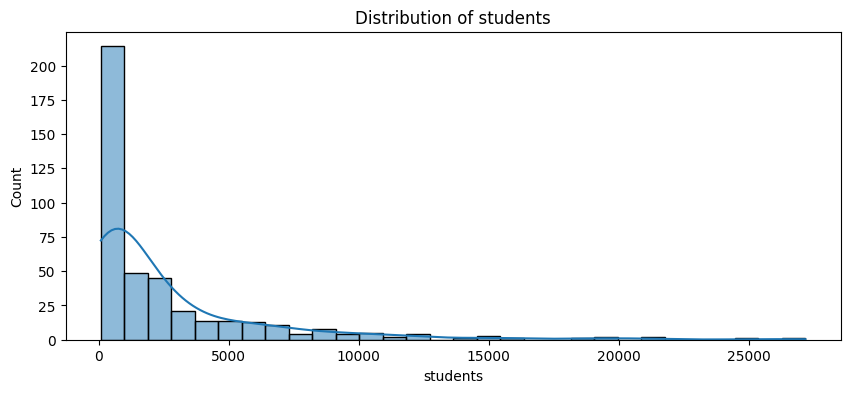

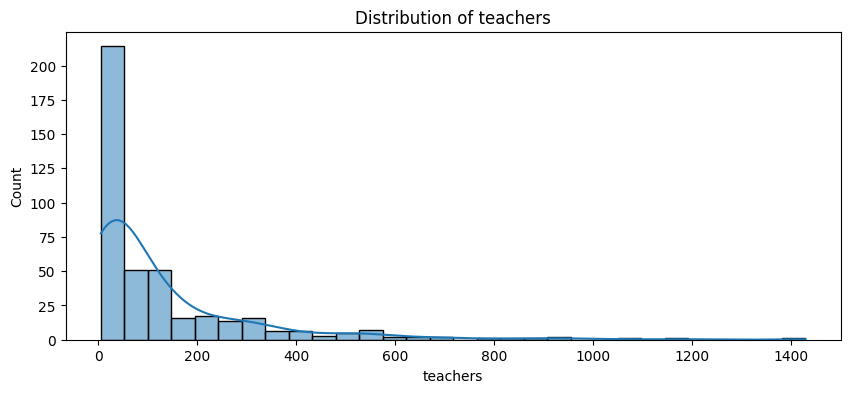

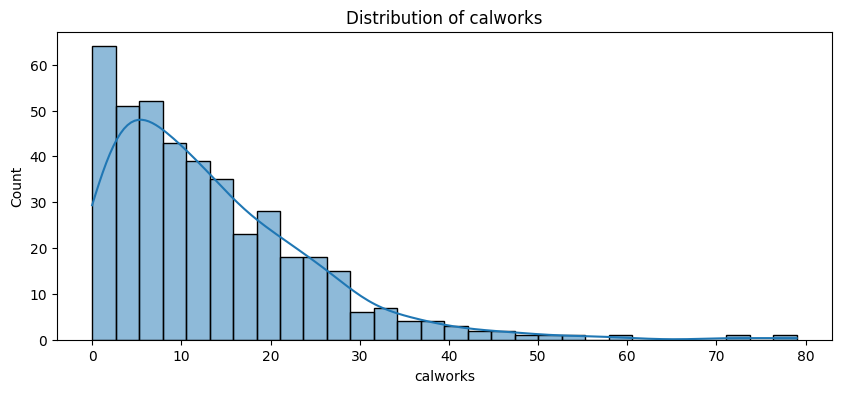

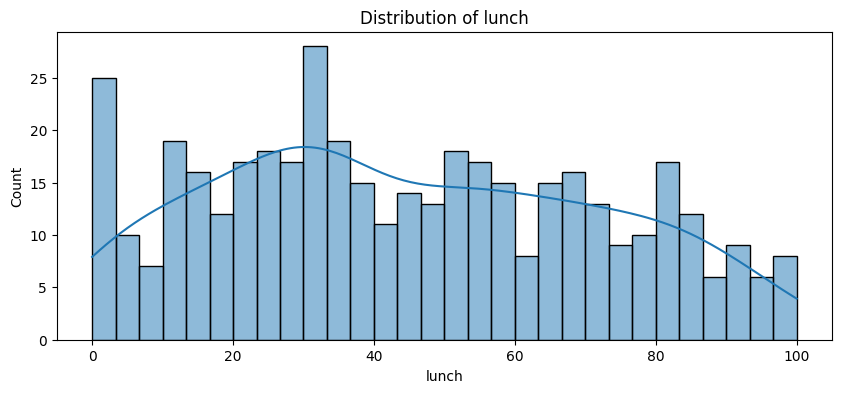

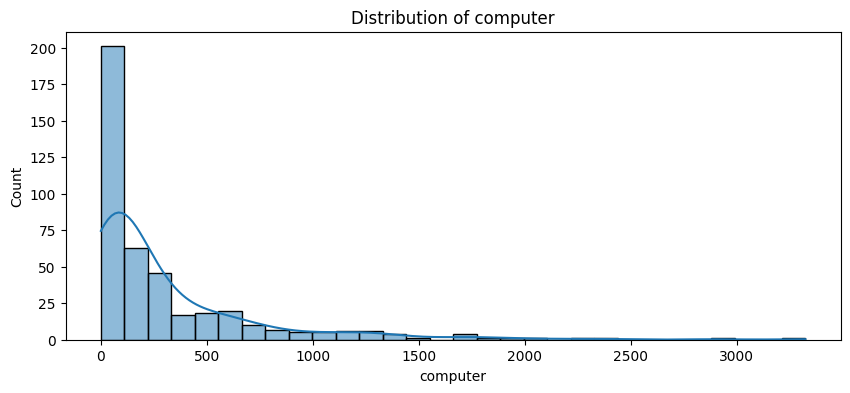

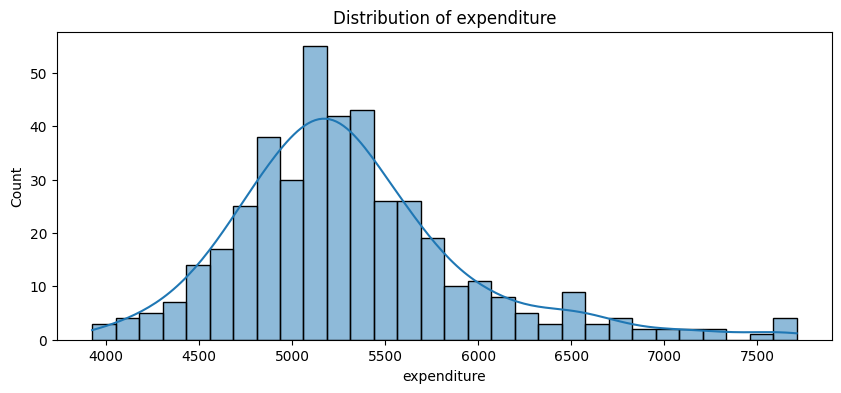

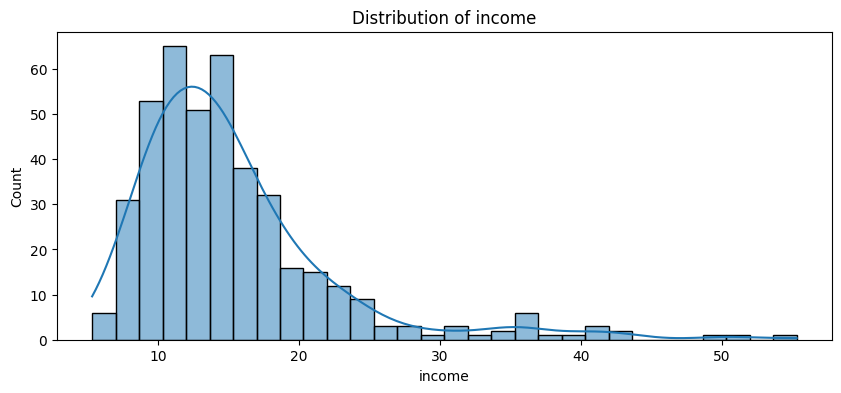

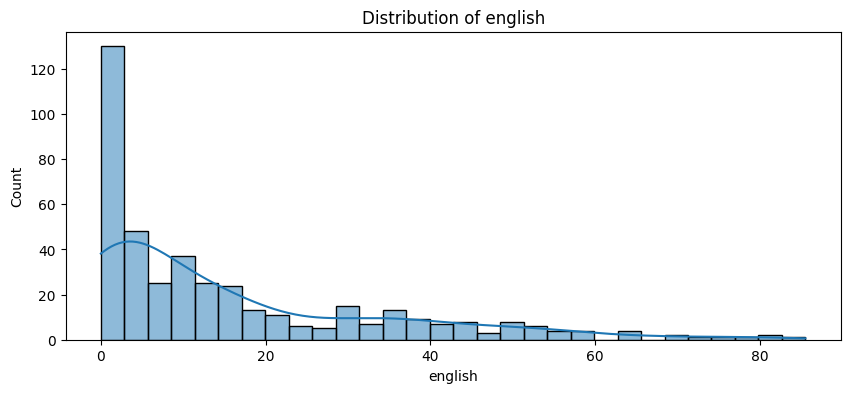

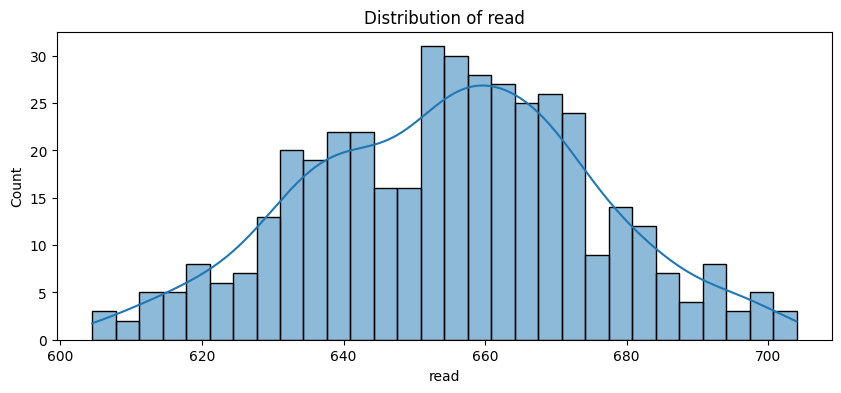

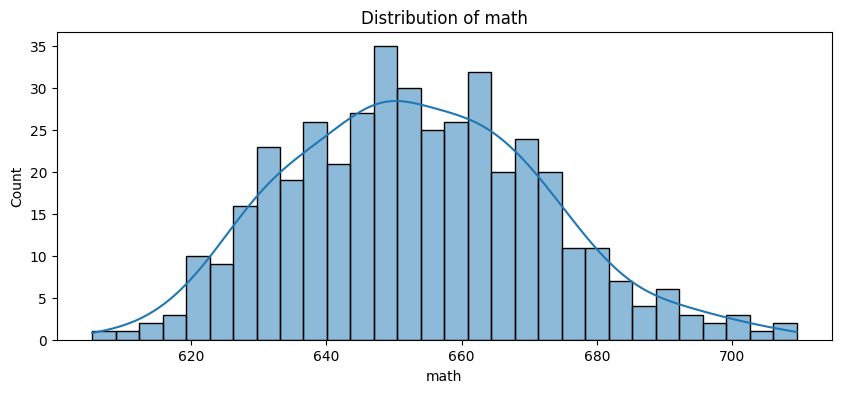

Mean Income: 15.316588053249177, 95% Confidence Interval: (14.625529609826394, 16.00764649667196)


In [15]:

data.info()

# Display statistical summary
data.describe()

# Identify data types
numerical_columns = ['students', 'teachers', 'calworks', 'lunch', 'computer', 'expenditure', 'income', 'english', 'read', 'math']
categorical_columns = ['grades', 'county', 'income_binned']

# Visualize the distribution of numerical features
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

# Measurement scales: Nominal, Ordinal, Interval, Ratio
# Example: 'income_binned' is Ordinal, 'county' is Nominal

# Comparing EDA with Classical and Bayesian Analysis
# Example: Displaying mean and confidence intervals using classical statistics
mean_income = data['income'].mean()
ci = norm.interval(0.95, loc=mean_income, scale=data['income'].std() / np.sqrt(len(data)))
print(f'Mean Income: {mean_income}, 95% Confidence Interval: {ci}')



In [16]:
# 2. Data Transformation
# -----------------------
# Handling missing data - using mean imputation for simplicity
# Select only numerical columns for mean imputation
numerical_data = data[numerical_columns]
numerical_data.fillna(numerical_data.mean(), inplace=True)

# Update the original DataFrame with imputed values
data[numerical_columns] = numerical_data

# Data Deduplication - dropping duplicate rows (if any)
data.drop_duplicates(inplace=True)
# Discretization of a continuous variable: binning 'income' into 3 categories
income_bins = [0, 10, 20, np.inf]
income_labels = ['Low', 'Medium', 'High']
data['income_binned'] = pd.cut(data['income'], bins=income_bins, labels=income_labels)

# Maximum Likelihood Estimation for missing data (example, not applied here)
# Using MLE requires domain-specific models and is more complex than simple imputation



<ipython-input-16-1d416cf6105e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data.fillna(numerical_data.mean(), inplace=True)


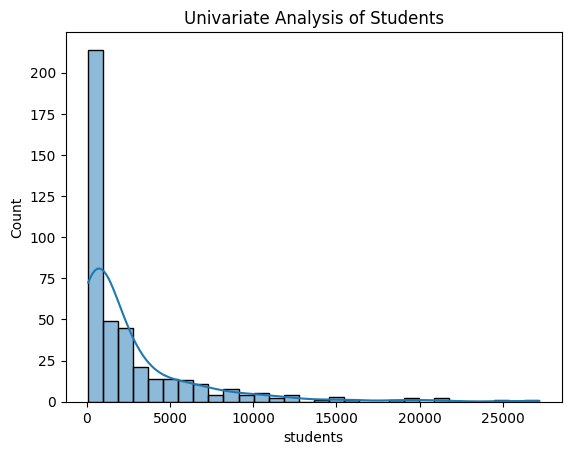

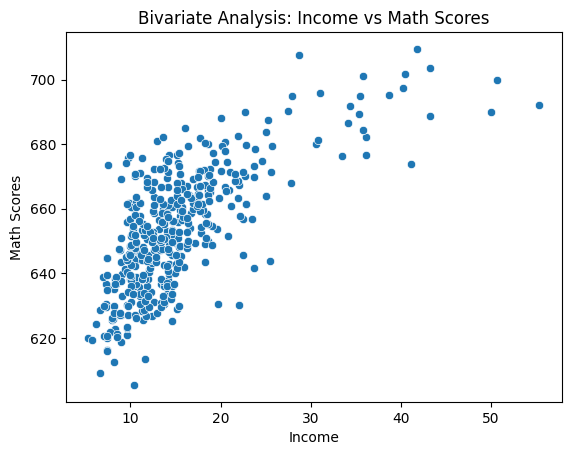

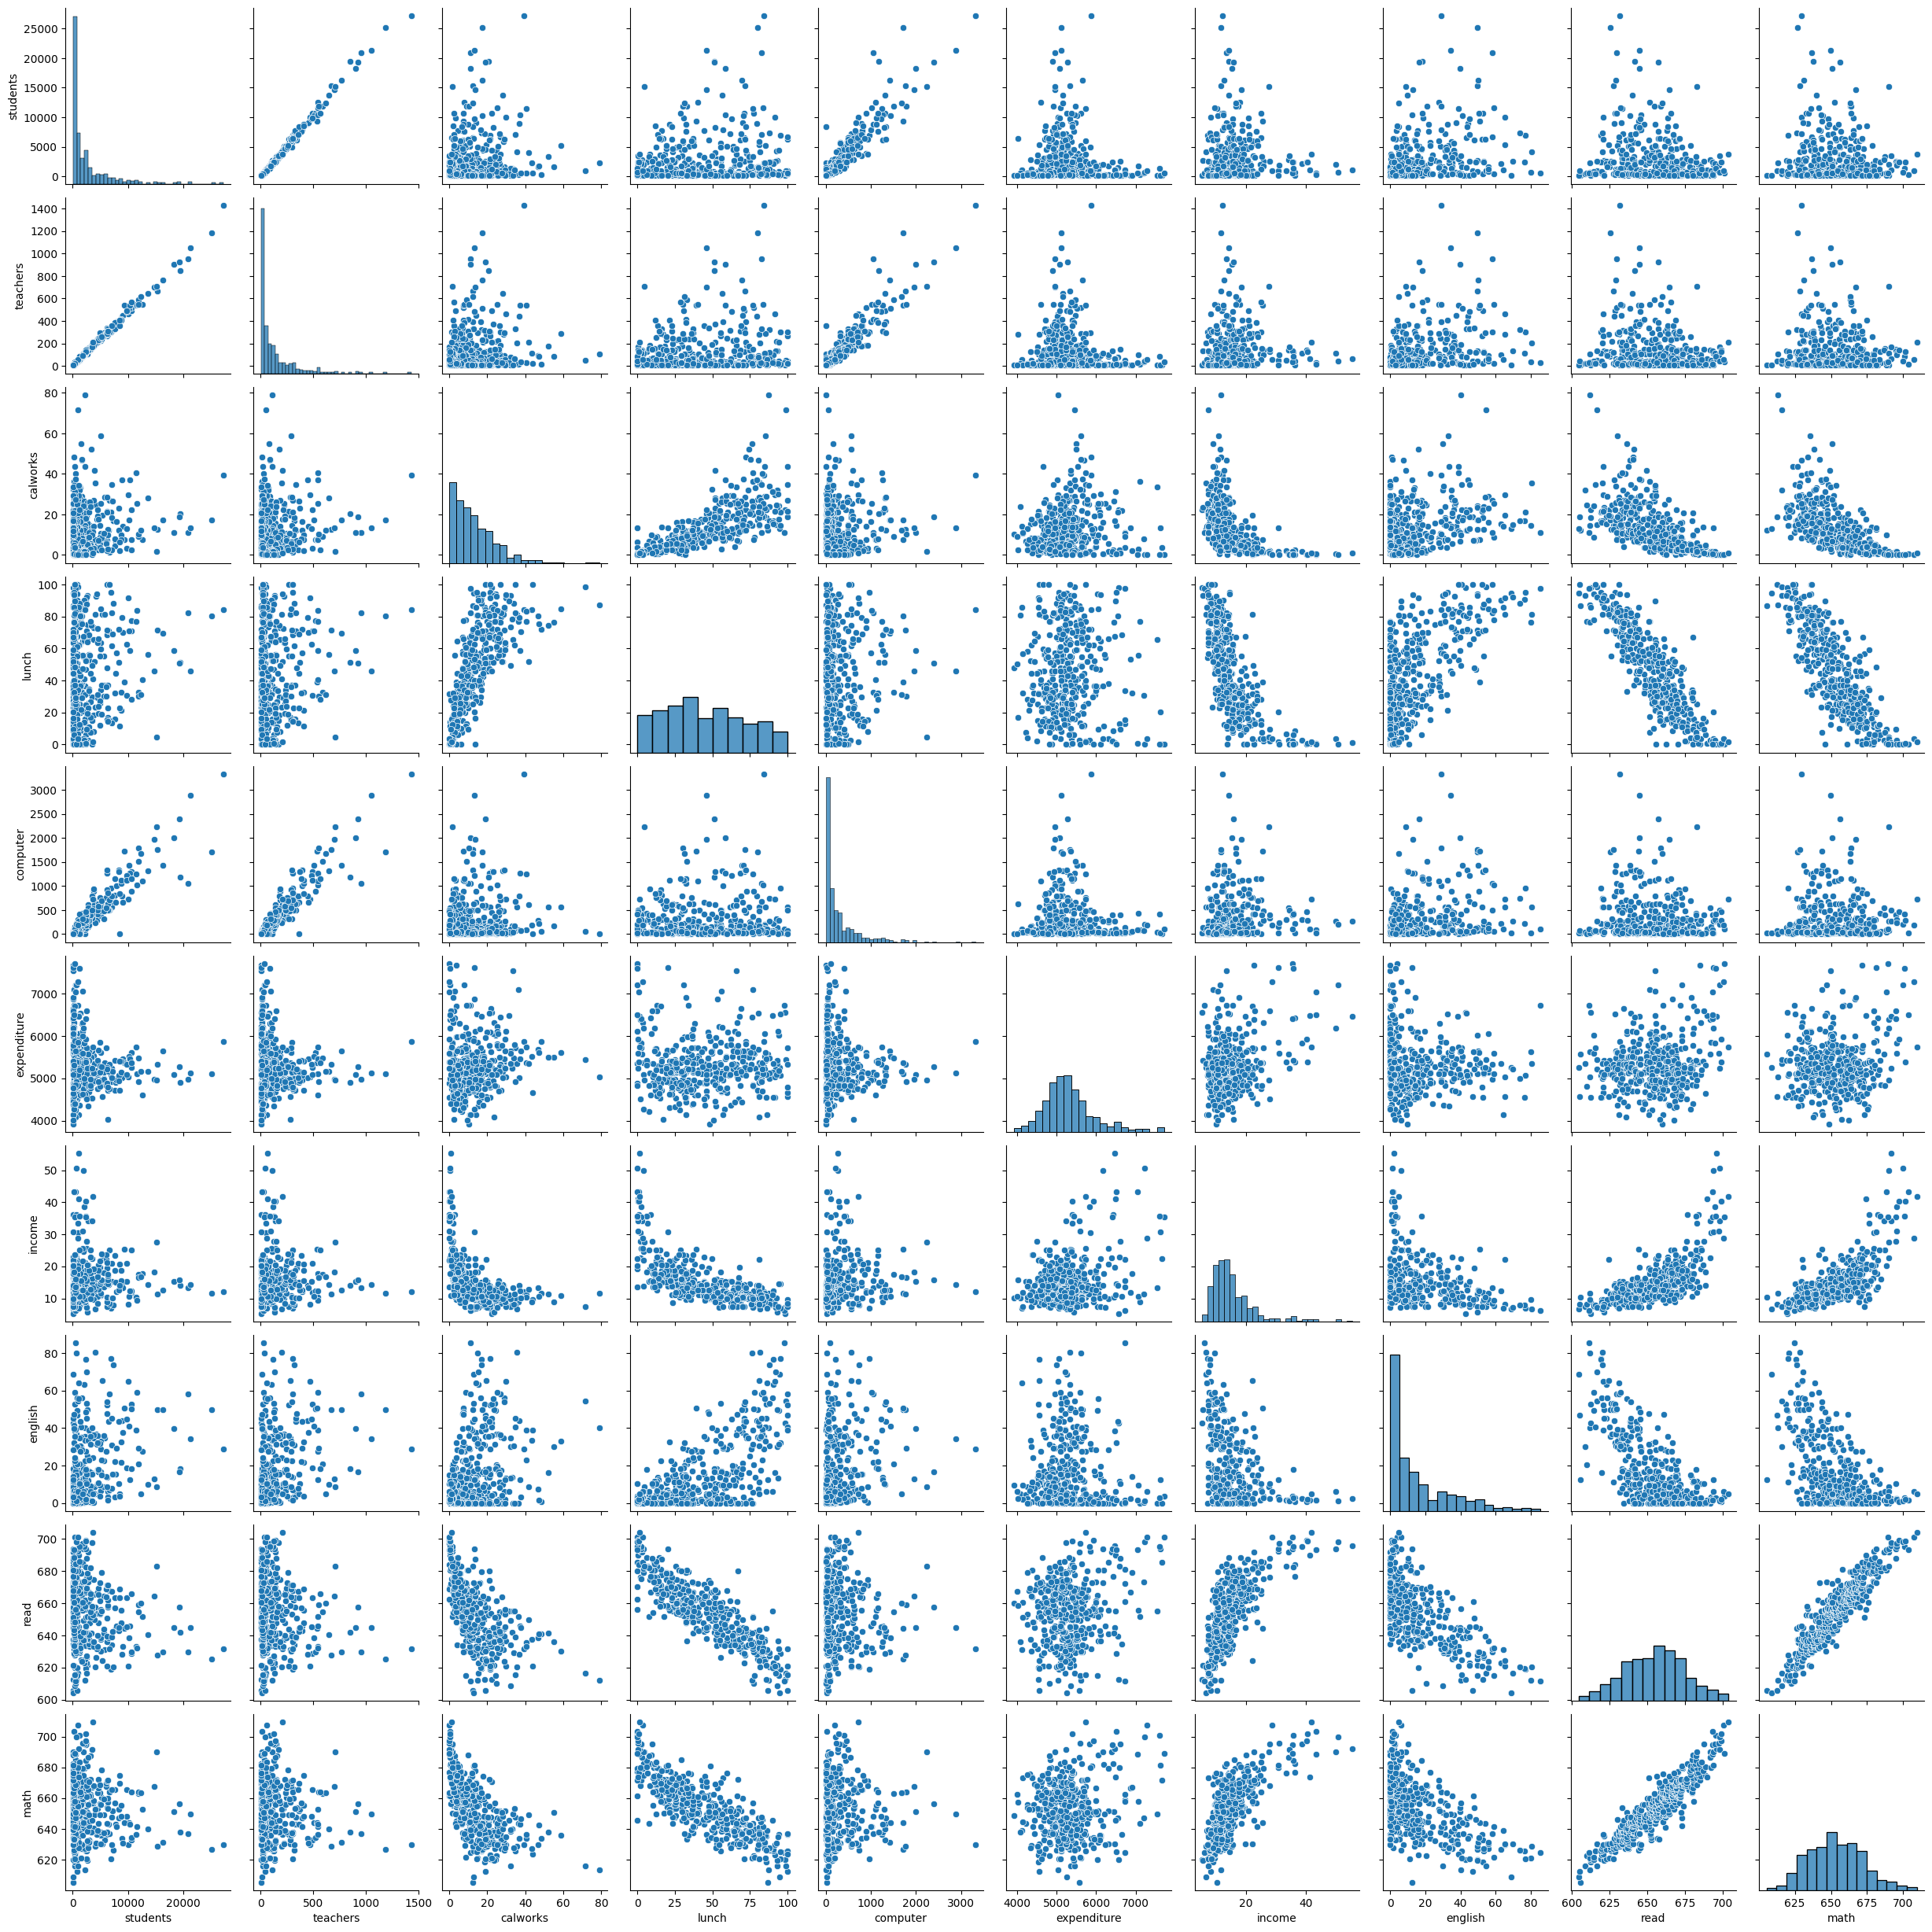

In [17]:
# 3. Correlation Analysis and Time Series Analysis
# ------------------------------------------------
# Types of analysis: Univariate, Bivariate, Multivariate
# Univariate Analysis: Distribution of 'students'
sns.histplot(data['students'], kde=True, bins=30)
plt.title('Univariate Analysis of Students')
plt.show()

# Bivariate Analysis: Relationship between 'income' and 'math'
sns.scatterplot(x='income', y='math', data=data)
plt.title('Bivariate Analysis: Income vs Math Scores')
plt.xlabel('Income')
plt.ylabel('Math Scores')
plt.show()

# Multivariate Analysis: Pairplot of selected numerical features
sns.pairplot(data[numerical_columns])
plt.show()

# Time Series Analysis (TSA) [Assuming time data is available]
# Note: The current dataset does not seem to have time-based data,
# but an example of TSA is given here for educational purposes.

# Example time series data
# data['date'] = pd.to_datetime(data['date_column'])
# data.set_index('date', inplace=True)
# data['students'].resample('M').mean().plot(figsize=(10, 6))
# plt.title('Monthly Average Number of Students')
# plt.show()



         rownames      district      students     teachers    calworks  \
count  420.000000    420.000000    420.000000   420.000000  420.000000   
mean   210.500000  67472.809524   2628.792857   129.067376   13.246042   
std    121.387808   3466.994655   3913.104985   187.912679   11.454821   
min      1.000000  61382.000000     81.000000     4.850000    0.000000   
25%    105.750000  64307.750000    379.000000    19.662499    4.395375   
50%    210.500000  67760.500000    950.500000    48.564999   10.520450   
75%    315.250000  70419.000000   3008.000000   146.350002   18.981350   
max    420.000000  75440.000000  27176.000000  1429.000000   78.994202   

            lunch     computer  expenditure      income     english  \
count  420.000000   420.000000   420.000000  420.000000  420.000000   
mean    44.705237   303.383333  5312.407541   15.316588   15.768155   
std     27.123381   441.341298   633.937053    7.225890   18.285927   
min      0.000000     0.000000  3926.069580    5.

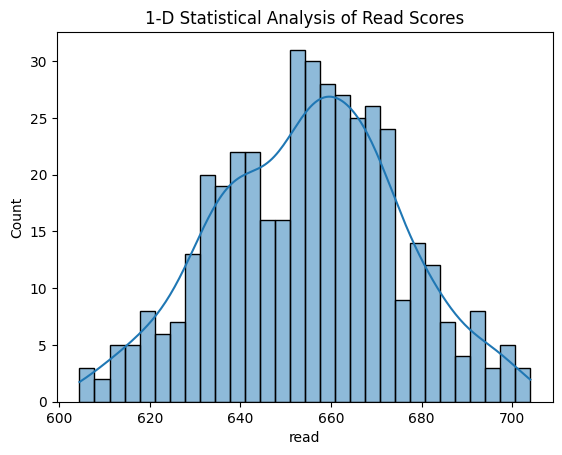

grades         KK-06  KK-08
income_binned              
Low                3     70
Medium            42    238
High              16     51


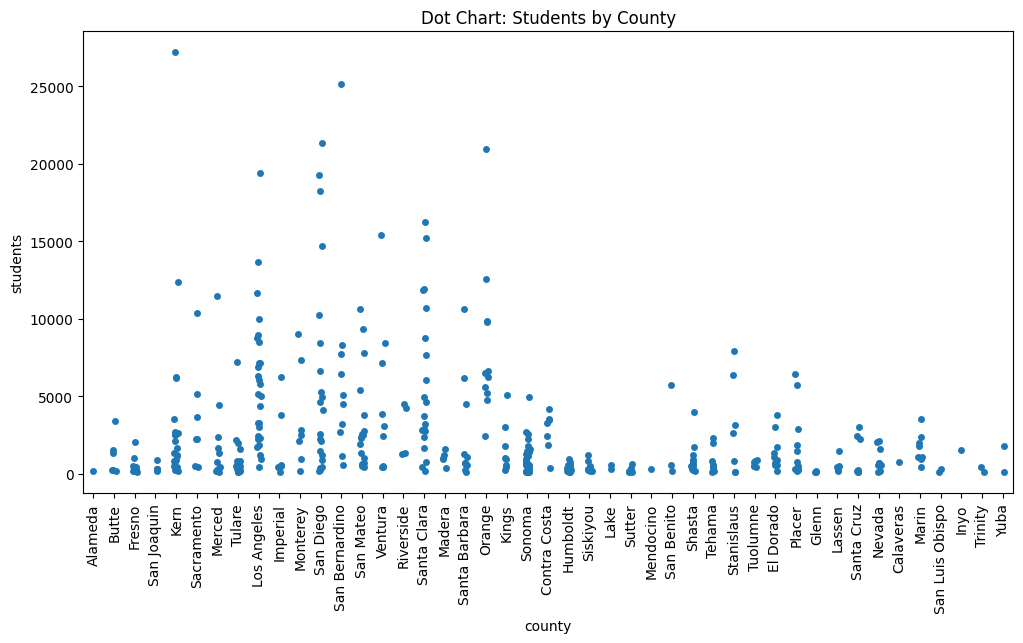

<ipython-input-18-f53eb422b55e>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('income_binned')['math'].mean().plot(kind='bar', figsize=(8, 6))


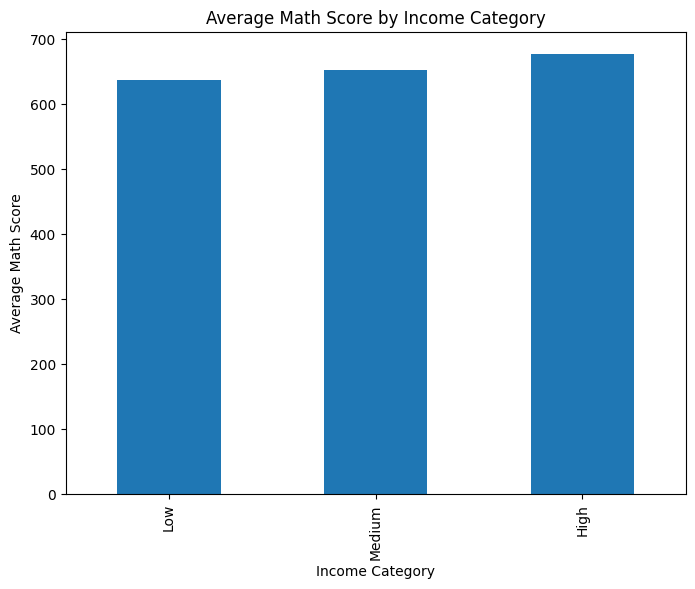

In [18]:
# 4. Data Summarization and Visualization
# ---------------------------------------
# Statistical summary measures
print(data.describe())

# 1-D Statistical data analysis: Distribution of 'read' scores
sns.histplot(data['read'], kde=True, bins=30)
plt.title('1-D Statistical Analysis of Read Scores')
plt.show()

# 2-D Statistical data analysis: Contingency table for 'income_binned' and 'grades'
contingency_table = pd.crosstab(data['income_binned'], data['grades'])
print(contingency_table)

# Visualization: Scatter plots, Dot charts, Bar plots
# Scatter plot already shown above
# Dot chart for 'students' by 'county'
plt.figure(figsize=(12, 6))
sns.stripplot(x='county', y='students', data=data, jitter=True)
plt.xticks(rotation=90)
plt.title('Dot Chart: Students by County')
plt.show()

# Bar plot for average 'math' score by 'income_binned'
data.groupby('income_binned')['math'].mean().plot(kind='bar', figsize=(8, 6))
plt.title('Average Math Score by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Average Math Score')
plt.show()



<ipython-input-19-0a06c28267f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


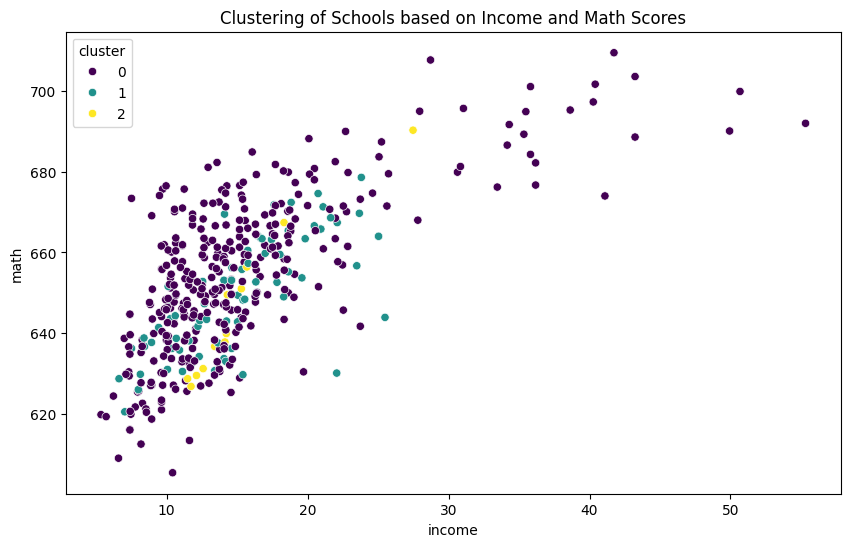

In [19]:
# 5. Clustering Algorithms
# ------------------------
# Introduction to KMeans clustering (Spectral clustering example not implemented)
X = data[['students', 'teachers', 'income', 'read', 'math']]
X.fillna(X.mean(), inplace=True)

kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='math', hue='cluster', data=data, palette='viridis')
plt.title('Clustering of Schools based on Income and Math Scores')
plt.show()

# Overview of Model-based clustering (Expectation-Maximization not implemented)



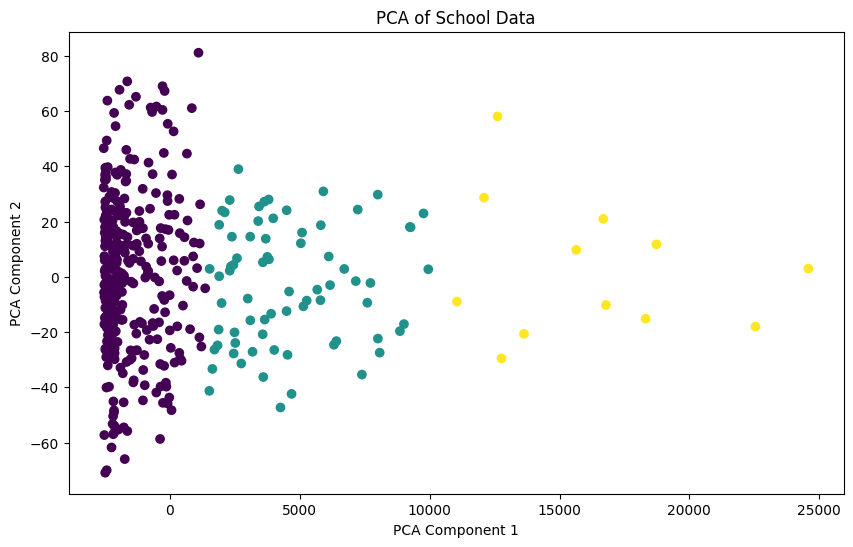

In [20]:
# 6. Dimensionality Reduction
# ---------------------------
# Linear Methods: Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot of PCA components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of School Data')
plt.show()

# Non-linear methods not implemented: Multidimensional Scaling, Manifold Learning, Self-Organizing Maps



In [21]:
# 7. Model Development and Evaluation
# ------------------------------------
# Construct a linear regression model to predict math scores
X = data[['income', 'students', 'teachers']]
y = data['math']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')

# Reinforcement Learning: Overview (not implemented)
# Understanding reinforcement learning: Difference between supervised and reinforcement learning
# Reinforcement learning involves learning by interacting with an environment, unlike supervised learning which uses labeled data.


Mean Squared Error: 202.97747231897907
R^2 Score: 0.598342850874574


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
sns.set_palette("viridis")

features = data.drop(columns=['math', 'rownames', 'school'])




In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column])
    label_encoders[column] = le



In [24]:
# Standardize numerical features for visual consistency
scaler = StandardScaler()
numerical_features = features.select_dtypes(include=['int64', 'float64']).columns
features[numerical_features] = scaler.fit_transform(features[numerical_features])



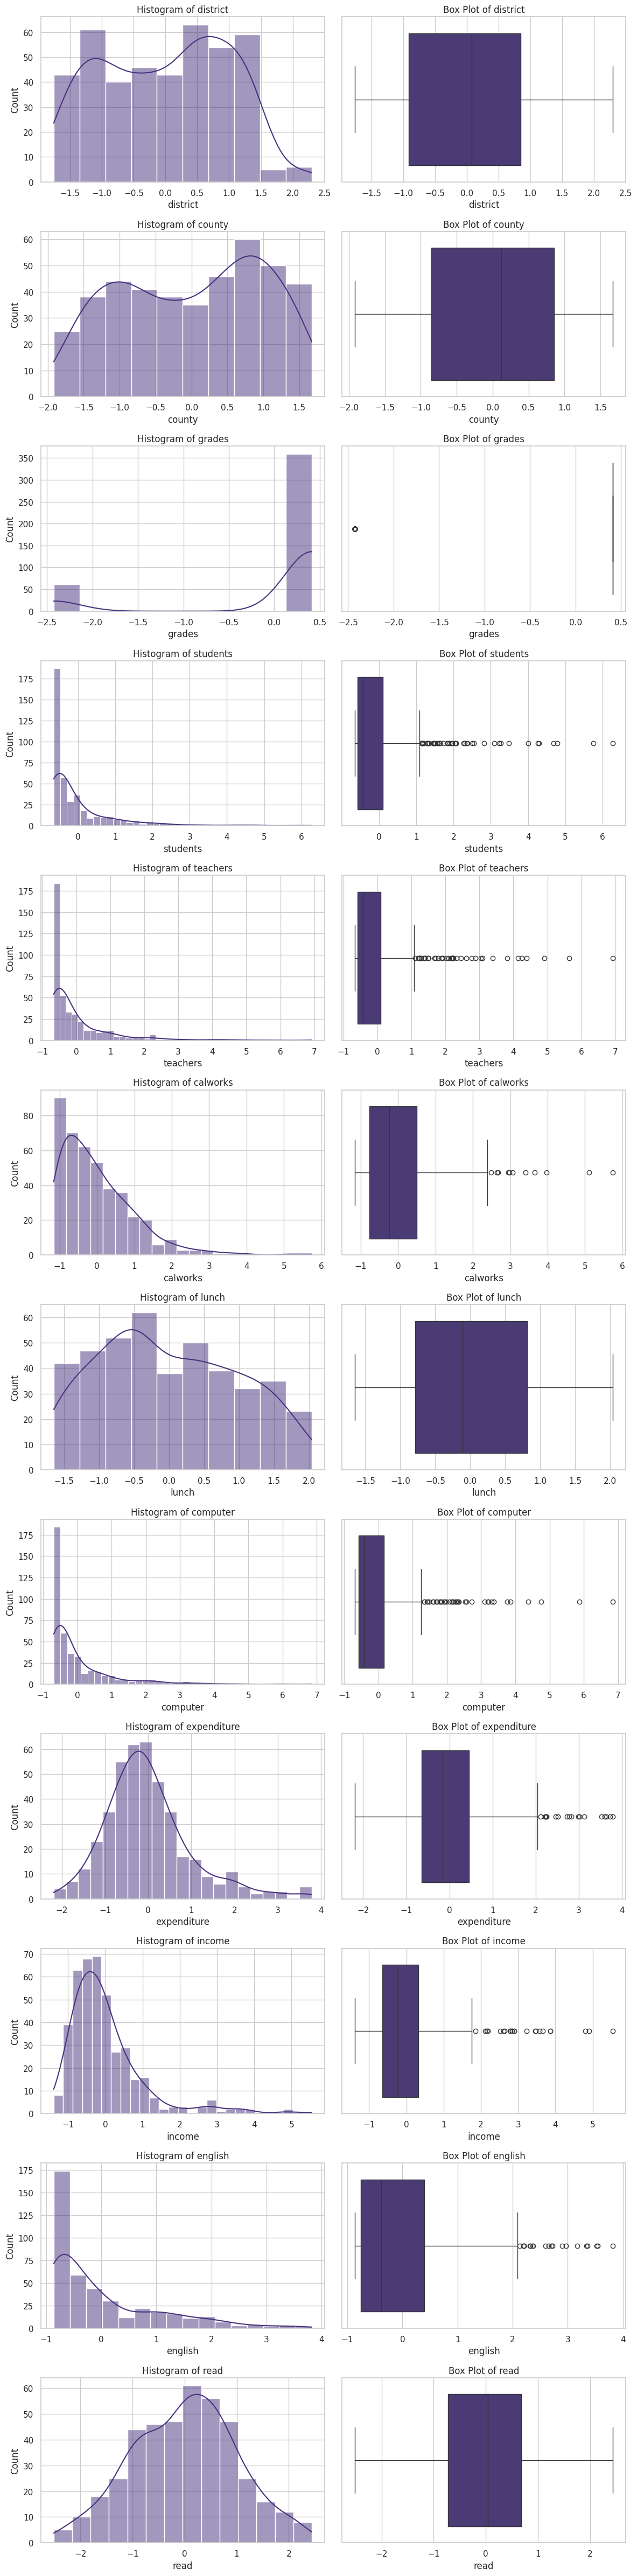

In [25]:
# 2. Univariate Analysis - Histograms and box plots for numerical features
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(12, 4 * len(numerical_features)))

for i, col in enumerate(numerical_features):
    # Histogram
    sns.histplot(features[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')

    # Box plot
    sns.boxplot(x=features[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()



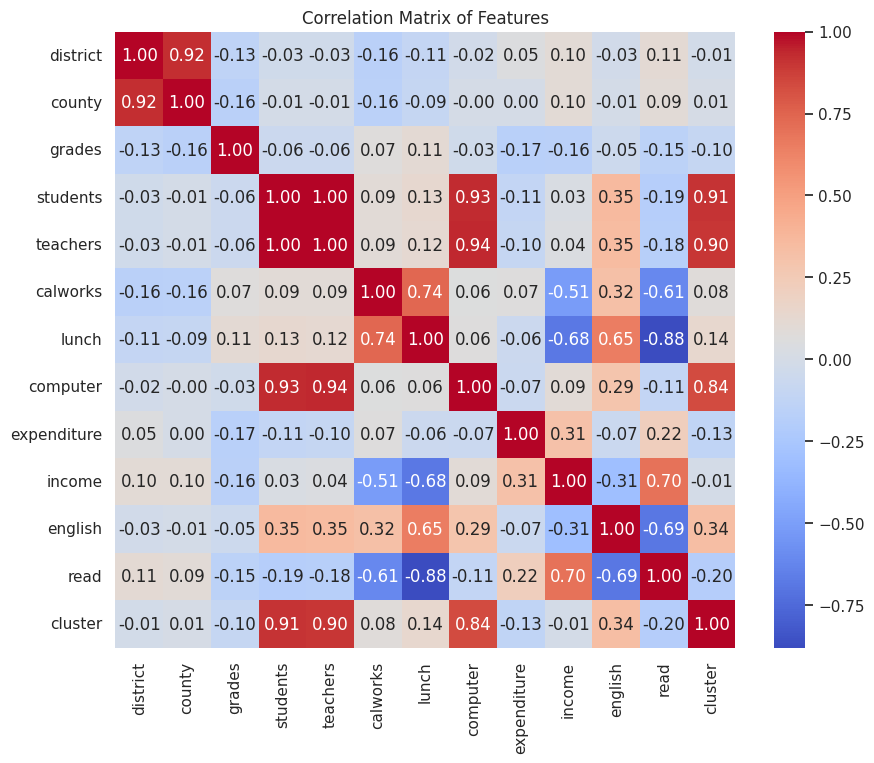

In [27]:
# 3. Bivariate Analysis - Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
# Explicitly select only numerical features for correlation
correlation_matrix = features.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()

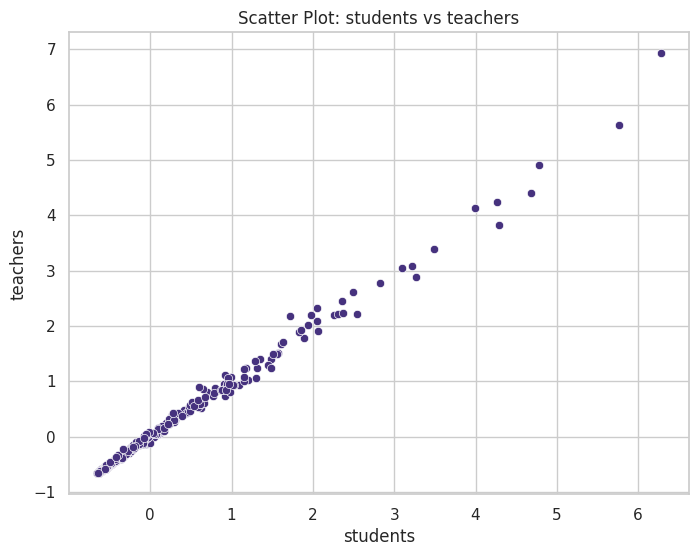

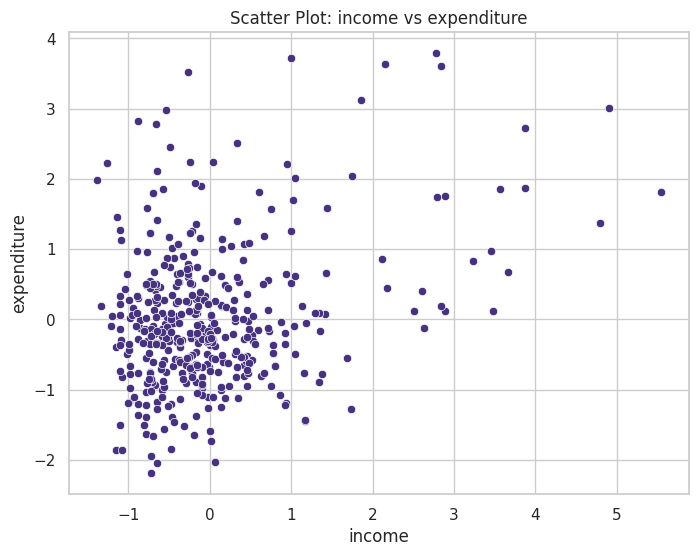

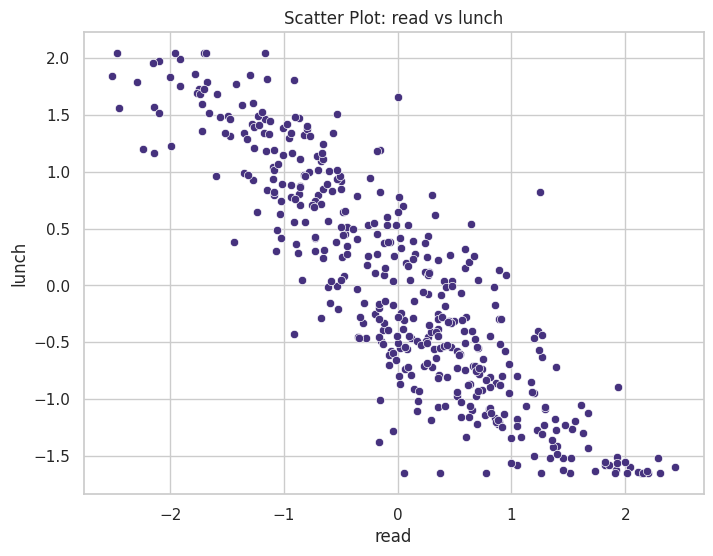

In [28]:
# Additional Bivariate Analysis - Scatter Plots for Selected Pairs
selected_pairs = [('students', 'teachers'), ('income', 'expenditure'), ('read', 'lunch')]
for x, y in selected_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=features, x=x, y=y)
    plt.title(f'Scatter Plot: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()



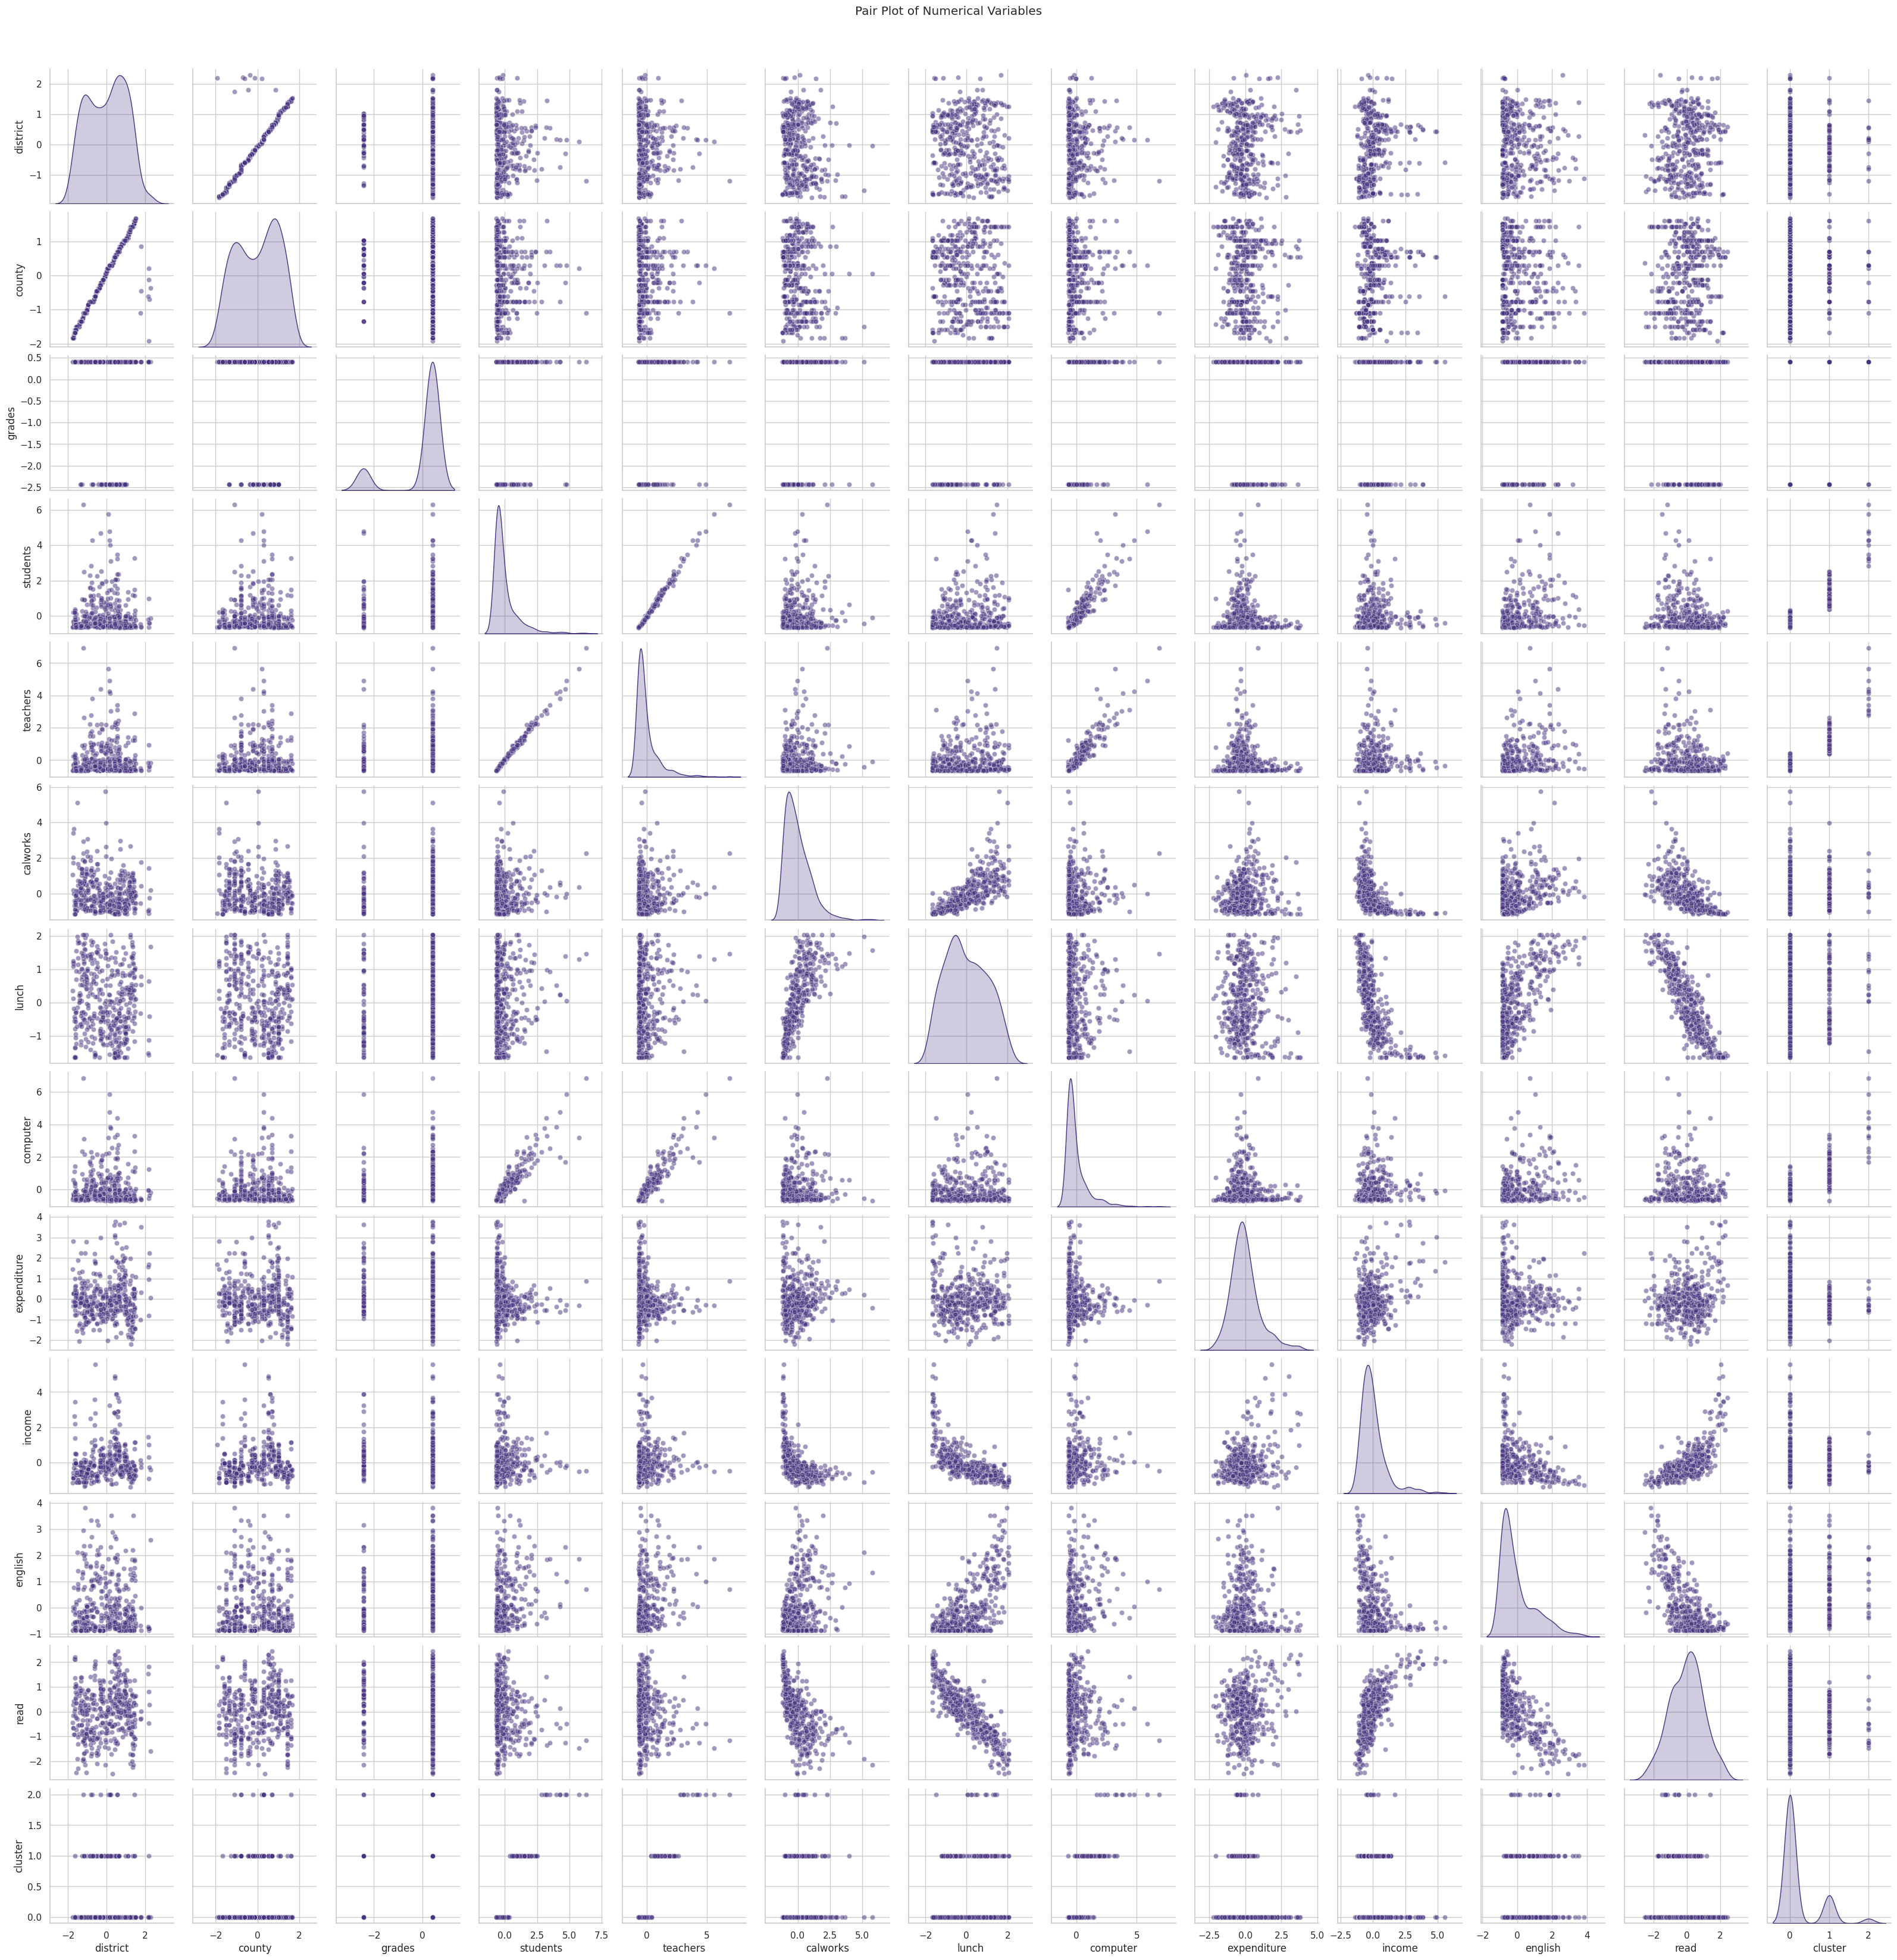

In [29]:
# 4. Multivariate Analysis - Pair Plot
try:
    sns.pairplot(features, diag_kind='kde', plot_kws={'alpha': 0.5})
    plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
    plt.show()
except Exception as e:
    print("Pair plot generation encountered an issue:", e)



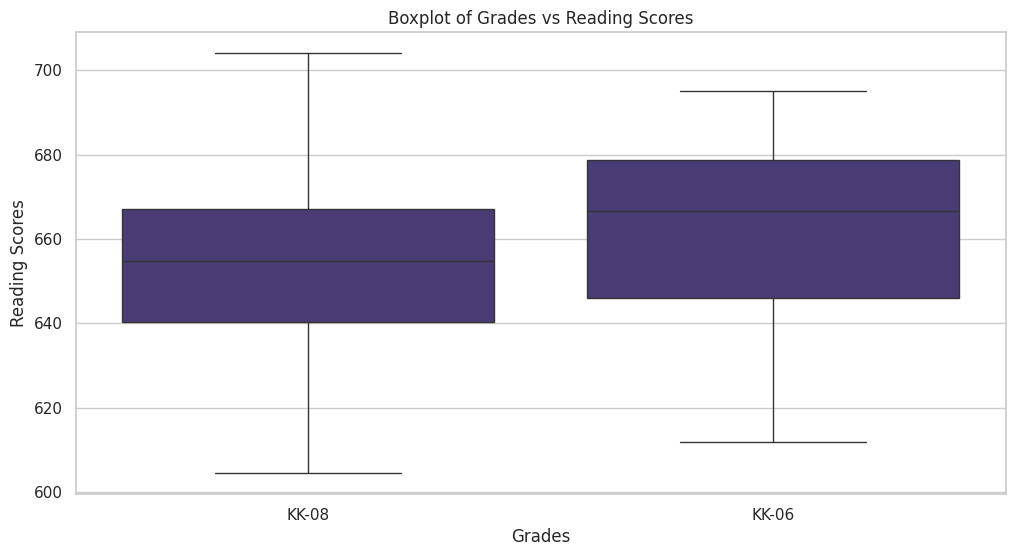

In [30]:
# Multivariate Analysis - Exploring Relationships with Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x='grades', y='read', data=data)
plt.title('Boxplot of Grades vs Reading Scores')
plt.xlabel('Grades')
plt.ylabel('Reading Scores')
plt.show()



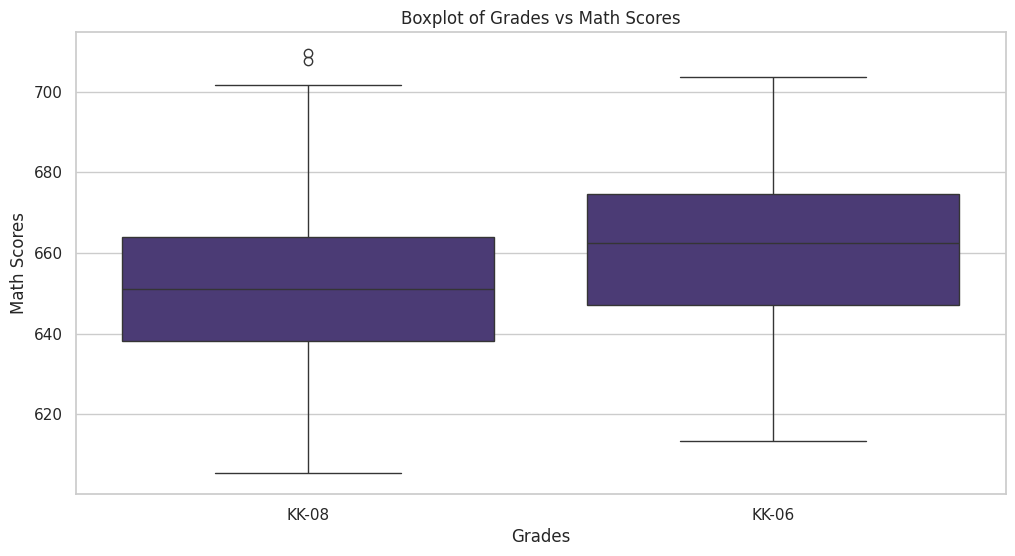

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='grades', y='math', data=data)
plt.title('Boxplot of Grades vs Math Scores')
plt.xlabel('Grades')
plt.ylabel('Math Scores')
plt.show()


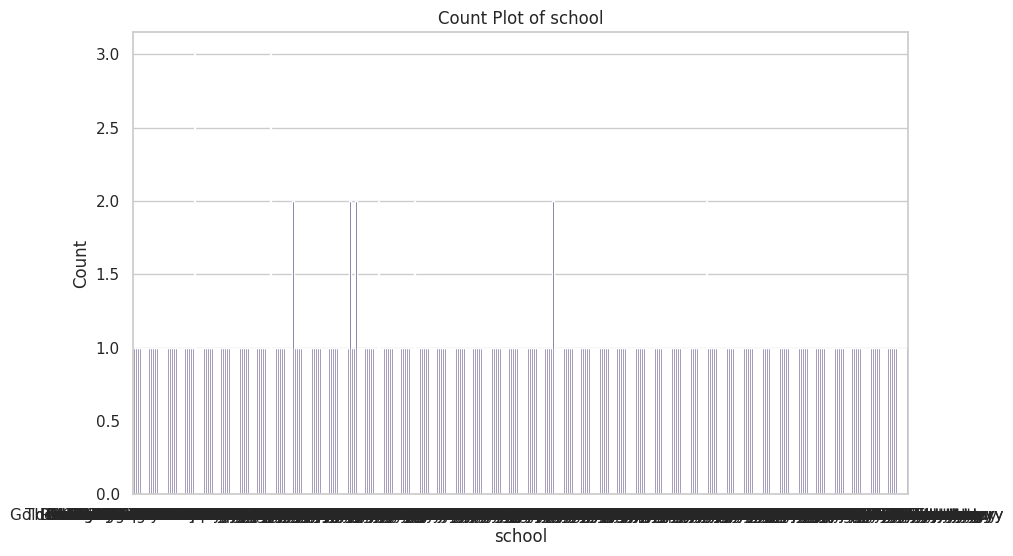

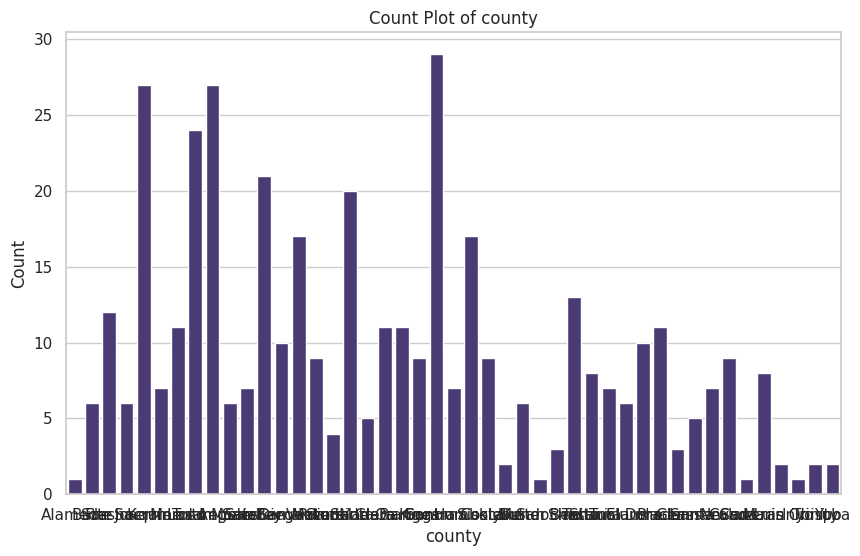

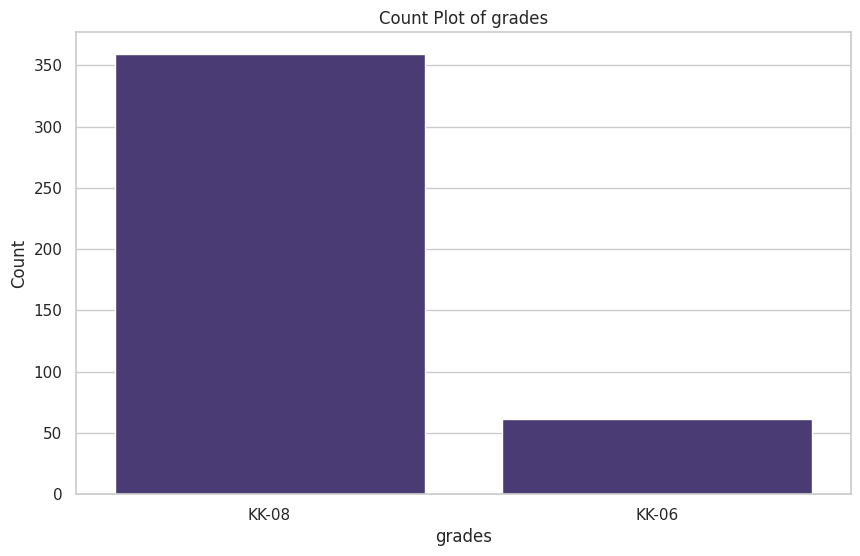

In [32]:
# 5. Additional EDA Methods

# Categorical Data Analysis - Bar Plots for Categorical Variables
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()



In [33]:
# Outlier Detection - Z-Score Method
from scipy import stats
for col in numerical_features:
    z_scores = stats.zscore(features[col])
    outliers = (abs(z_scores) > 3)
    print(f"Number of outliers in {col}: {sum(outliers)}")



Number of outliers in district: 0
Number of outliers in county: 0
Number of outliers in grades: 0
Number of outliers in students: 11
Number of outliers in teachers: 10
Number of outliers in calworks: 6
Number of outliers in lunch: 0
Number of outliers in computer: 11
Number of outliers in expenditure: 7
Number of outliers in income: 10
Number of outliers in english: 6
Number of outliers in read: 0


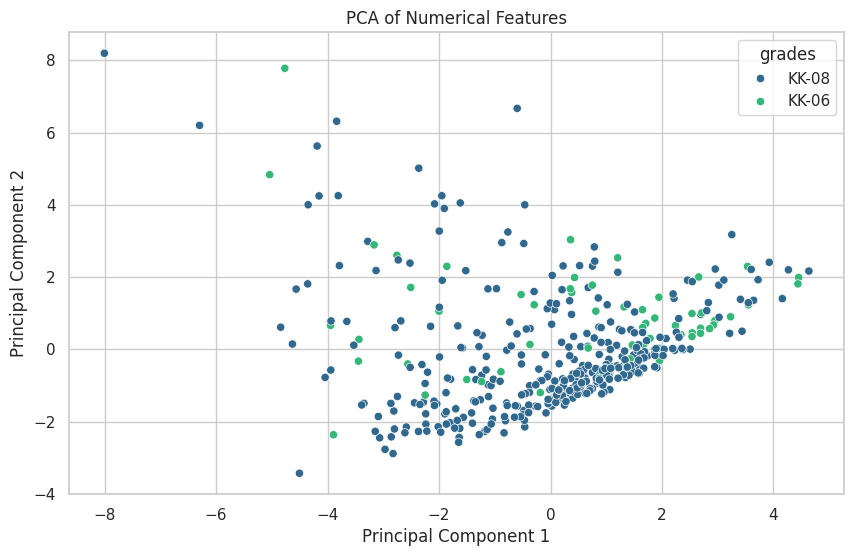

In [34]:
# PCA for Dimensionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features[numerical_features])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=data['grades'], palette='viridis')
plt.title('PCA of Numerical Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



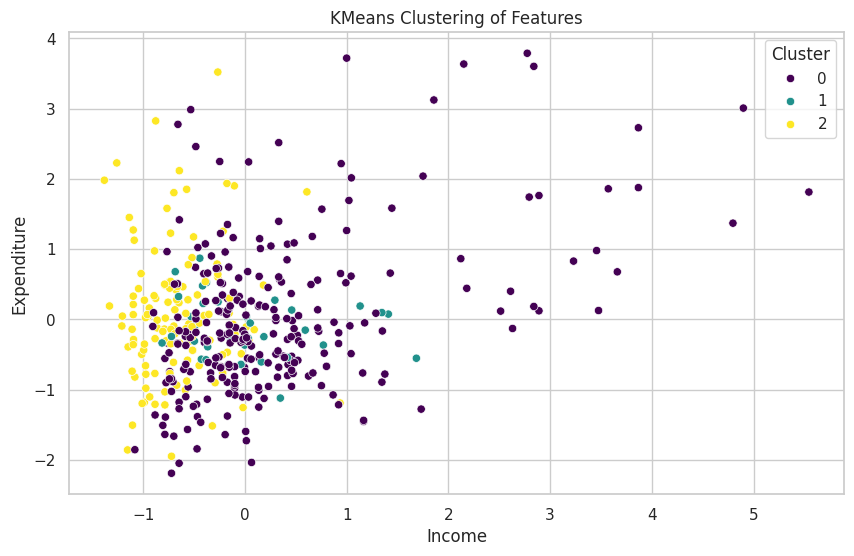

In [35]:
# Clustering - KMeans for Segmentation
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
features['Cluster'] = kmeans.fit_predict(features[numerical_features])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=features['income'], y=features['expenditure'], hue=features['Cluster'], palette='viridis')
plt.title('KMeans Clustering of Features')
plt.xlabel('Income')
plt.ylabel('Expenditure')
plt.show()
